In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Employee Attrition.csv')

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Identify missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Remove duplicate rows
df = df.drop_duplicates()

# Replace specific values in categorical columns (example replacements)
df.replace({'Yes': 1, 'No': 0}, inplace=True)

# Fill missing values
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].fillna(df['EnvironmentSatisfaction'].mode()[0])
df['YearsAtCompany'] = df['YearsAtCompany'].fillna(df['YearsAtCompany'].mean())

# Convert numeric columns, forcing errors to NaN (example for one column)
df['MonthlyIncome'] = pd.to_numeric(df['MonthlyIncome'], errors='coerce')

Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

<ipython-input-1-3819665b6b68>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Yes': 1, 'No': 0}, inplace=True)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

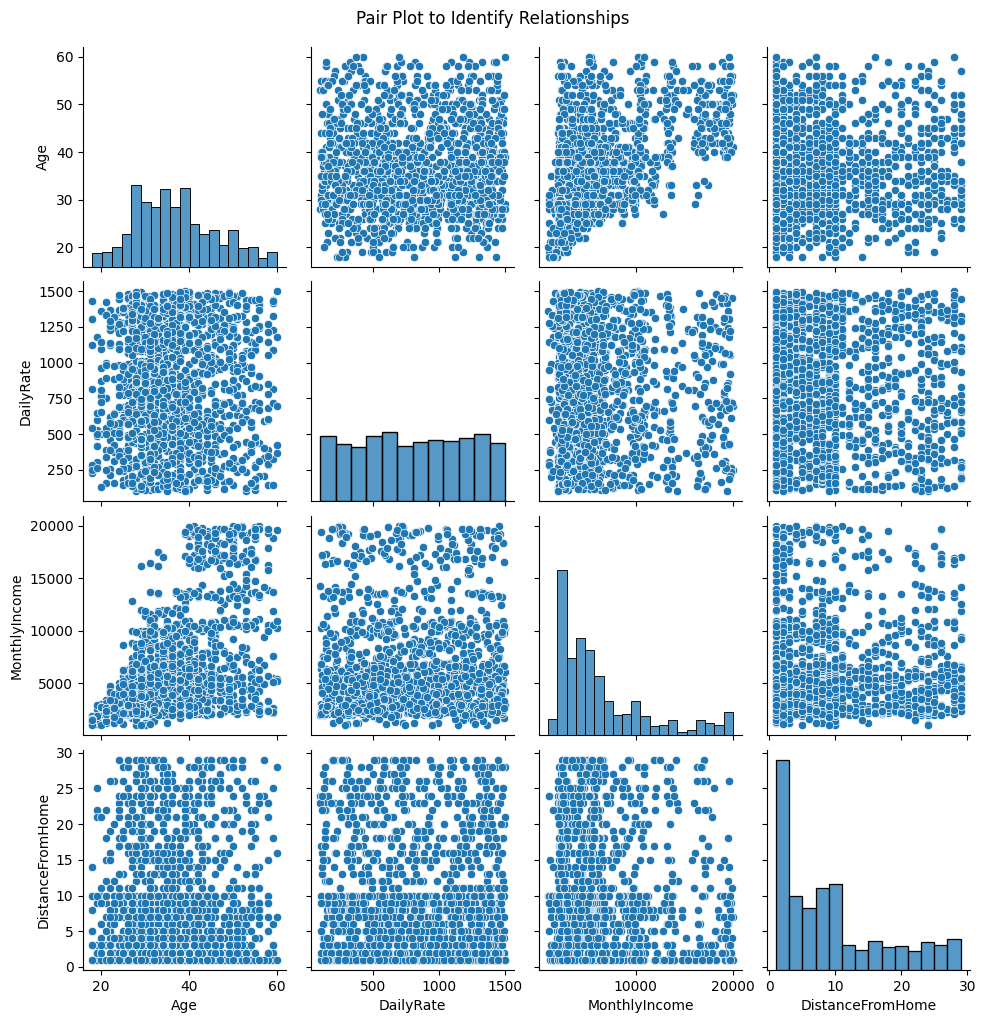

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of numerical columns for demonstration
subset_data = df[['Age', 'DailyRate', 'MonthlyIncome', 'DistanceFromHome']]

# Pair plot to visualize relationships between columns
sns.pairplot(subset_data)
plt.suptitle('Pair Plot to Identify Relationships', y=1.02)
plt.show()


In [19]:
# Independent variables (X) and Dependent variable (y)
X = df[['Age', 'DailyRate', 'DistanceFromHome']]  # Features
y = df['MonthlyIncome']  # Target variable


In [20]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape}")
print(f"Test data size: {X_test.shape}")


Training data size: (1176, 3)
Test data size: (294, 3)


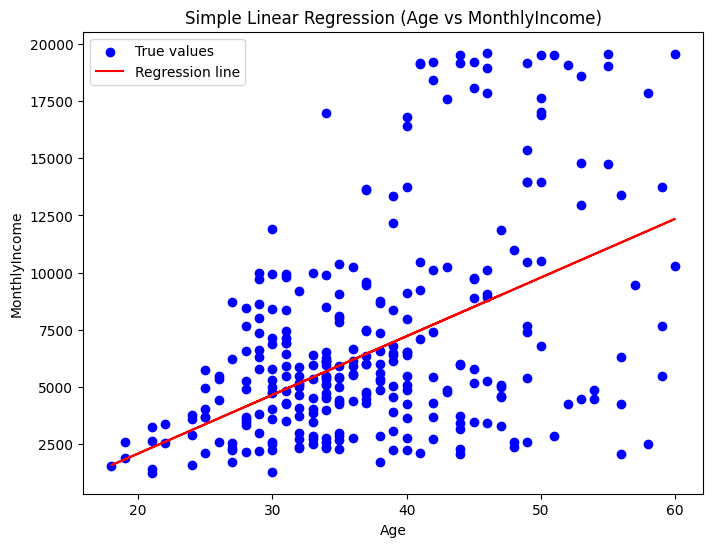

In [21]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the Simple Linear Regression model
simple_regressor = LinearRegression()
simple_regressor.fit(X_train[['Age']], y_train)

# Predict values on the test set
y_pred_simple = simple_regressor.predict(X_test[['Age']])

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Age'], y_test, color='blue', label='True values')
plt.plot(X_test['Age'], y_pred_simple, color='red', label='Regression line')
plt.title('Simple Linear Regression (Age vs MonthlyIncome)')
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')
plt.legend()
plt.show()


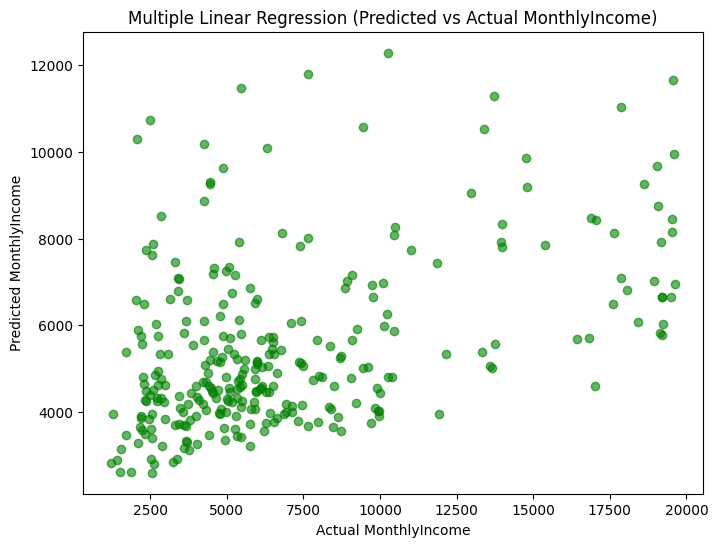

In [22]:
import numpy as np

# Apply log transformation to the dependent variable (MonthlyIncome)
y_log = np.log(y_train)

# Initialize and fit the Multiple Linear Regression model
multi_regressor = LinearRegression()
multi_regressor.fit(X_train, y_log)

# Predict values on the test set
y_pred_log = multi_regressor.predict(X_test)

# Transform predictions back from the log scale
y_pred_multi = np.exp(y_pred_log)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_multi, color='green', alpha=0.6)
plt.title('Multiple Linear Regression (Predicted vs Actual MonthlyIncome)')
plt.xlabel('Actual MonthlyIncome')
plt.ylabel('Predicted MonthlyIncome')
plt.show()


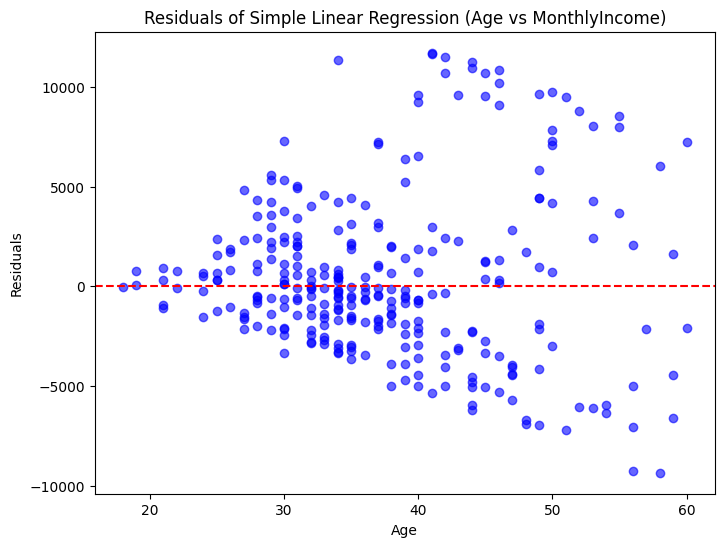

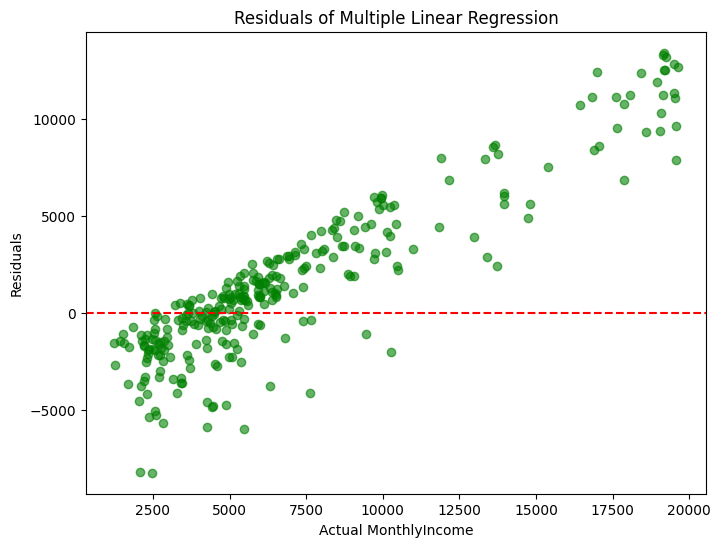

In [23]:
# Residuals for the simple regression model
residuals_simple = y_test - y_pred_simple

# Residuals for the multiple regression model
residuals_multi = y_test - y_pred_multi

# Plot residuals for Simple Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Age'], residuals_simple, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of Simple Linear Regression (Age vs MonthlyIncome)')
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.show()

# Plot residuals for Multiple Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals_multi, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of Multiple Linear Regression')
plt.xlabel('Actual MonthlyIncome')
plt.ylabel('Residuals')
plt.show()
